In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris(as_frame=True)
iris = iris.frame #reassigning iris from a sklearn bunch to pandas df
type(iris)

pandas.core.frame.DataFrame

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
print("Rows in dataset: " + str(iris.shape[0]))
print("Columns in dataset: " + str(iris.shape[1]))

Rows in dataset: 150
Columns in dataset: 5


In [5]:
sub1 = iris.iloc[list(range(9))+[-1]]
print(sub1)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0  
6         

In [6]:
sub2 = iris.loc[
    iris['sepal width (cm)'] > 2.4,
    ['sepal length (cm)', 'sepal width (cm)', 'target']
]
sub2

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [7]:
Versicolor_Is_The_Best = (iris["target"] == 1).astype(int) * 100
Versicolor_Is_The_Best

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: target, Length: 150, dtype: int64

In [8]:
sw = (iris['sepal width (cm)'])
print(sw.min())
print(sw.median())
print(sw.max())

2.0
3.0
4.4


In [9]:
counter = 0
for i in range(0, len(sw)):
    if(counter >= 100):
        print(i)
        break
    counter = counter + sw[i]

29


In [10]:
def cmtoin(cm):
    return cm/2.54

In [11]:
sw_in = iris['sepal width (cm)'].transform(lambda x: cmtoin(x))

In [12]:
sw_in[0:7]

0    1.377953
1    1.181102
2    1.259843
3    1.220472
4    1.417323
5    1.535433
6    1.338583
Name: sepal width (cm), dtype: float64

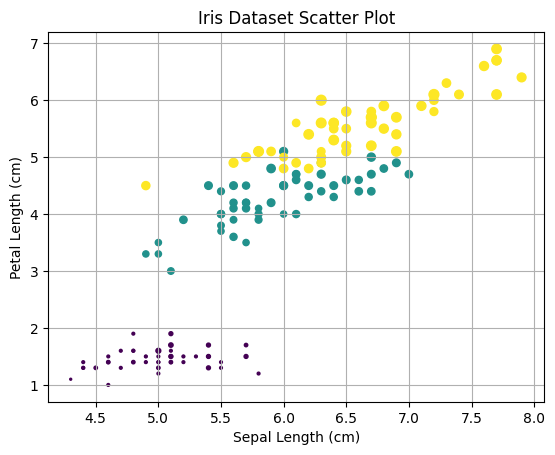

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(x=iris['sepal length (cm)'],
y=iris['petal length (cm)'],
c=iris['target'],
s=iris['petal width (cm)']*20)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.grid(True)
plt.title('Iris Dataset Scatter Plot')
#plt.savefig(fname="Iris_Scatter")
plt.show()

1.1\) Make a histogram of the variable Sepal Width


/tmp/ipykernel_598202/1707618731.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


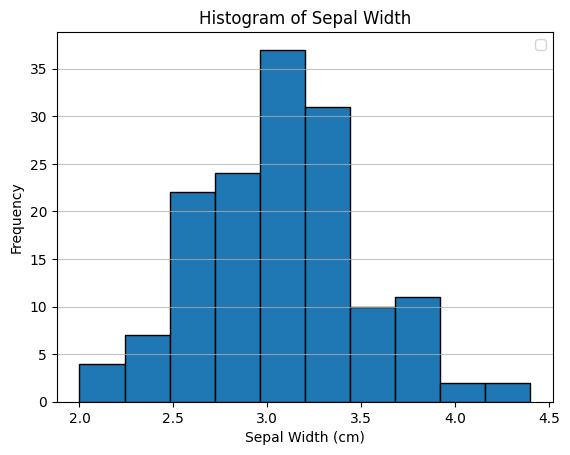

In [ ]:
plt.hist(iris['sepal width (cm)'], bins=10, edgecolor='black')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width')
plt.legend()
plt.grid(axis='y', alpha=0.75)
#plt.savefig(fname="Sepal_Width_Hist")
plt.show()

1.2\) Based on the histogram, I would expect the mean and median to be almost identical, with a slightly higher mean. This is due to the *slight* left skew to the data.

1.3) Compute the actual values of median and mean

In [15]:
print(iris['sepal width (cm)'].mean())
print(iris['sepal width (cm)'].median())

3.0573333333333337
3.0


1.4\) Only 27% of the flowers have a sepal width of higher than 3.3 cm

In [16]:
p73 = iris['sepal width (cm)'].quantile(1 - 0.27)
print(p73)

3.3


1.5\) Correlation pairplots

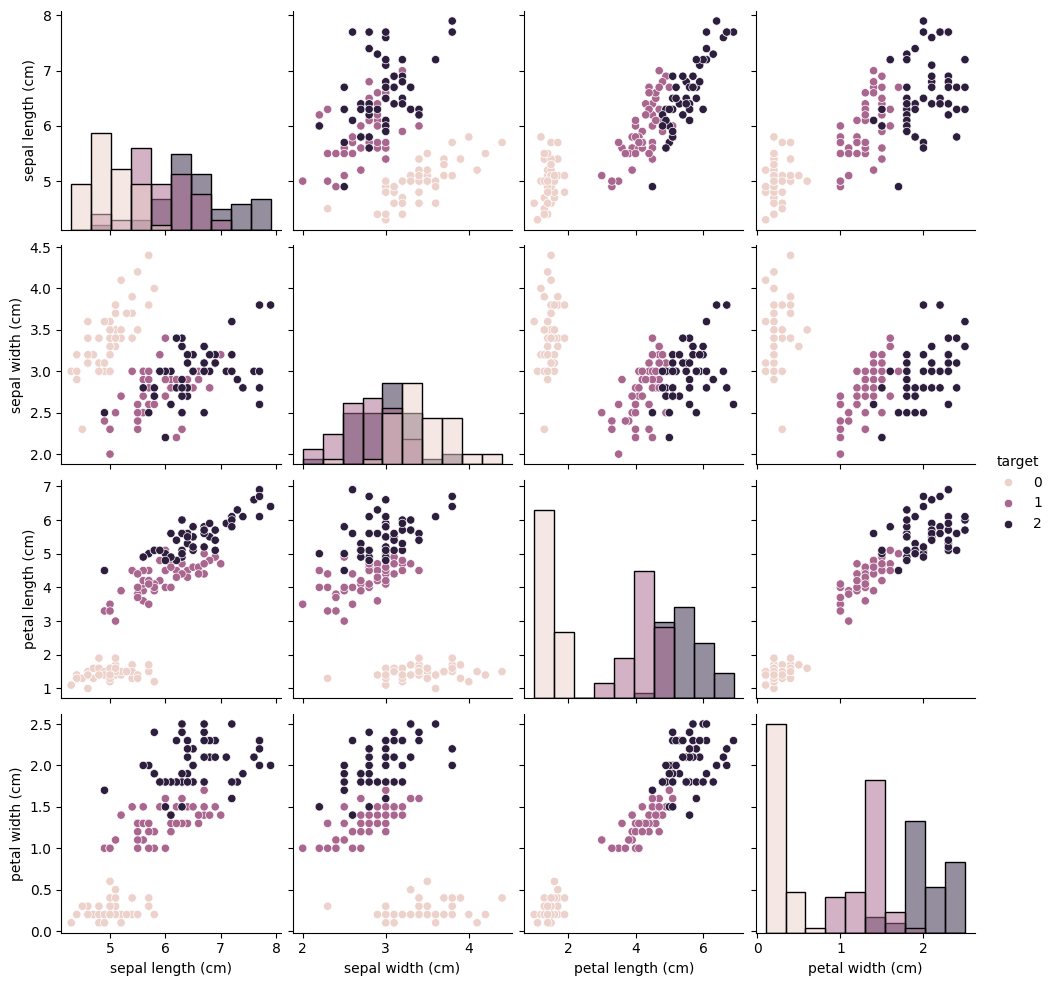

In [28]:
sns.pairplot(iris, hue='target', diag_kind='hist', diag_kws={'bins': 10})
plt.savefig(fname="Correlation_Iris")
plt.show()

Correlation matrix for exact $R^2$

In [18]:
print(iris.corr())

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


The pair with the highest correlation is petal length and petal width with a $R^2$ of .962

2.

In [19]:
data = { "weight": [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 5.14, 4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69, 6.31, 5.12, 5.54, 5.50, 5.37, 5.29, 4.92, 6.15, 5.80, 5.26], "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10}
PlantGrowth = pd.DataFrame(data)

2.1\) Histogram of weight

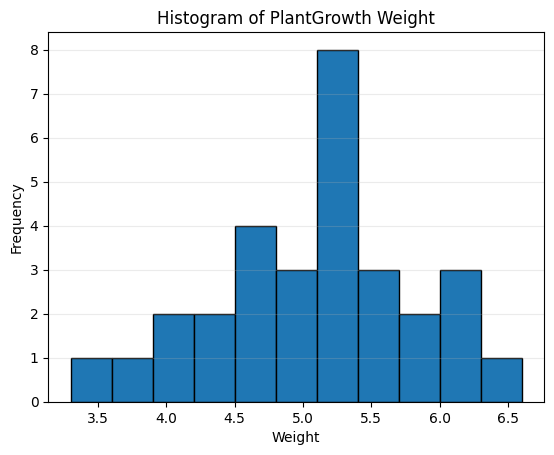

In [30]:
bins = np.arange(3.3, PlantGrowth['weight'].max() + 0.3, 0.3)
plt.figure()
plt.hist(PlantGrowth['weight'], bins=bins, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of PlantGrowth Weight')
plt.grid(axis='y', alpha=0.25)
plt.savefig(fname='PlantGrowthHistogram.png')
plt.show()

2.2\) Boxplots separated by group

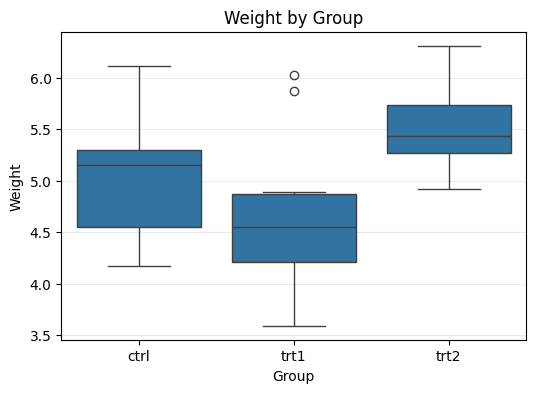

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x='group', y='weight', data=PlantGrowth)
plt.xlabel('Group')
plt.ylabel('Weight')
plt.title('Weight by Group')
plt.grid(axis='y', alpha=0.25)
plt.savefig(fname='WeightByGroup.png')
plt.show()

2.3\) A little less than half of control group weights are less than the minimum of trt2

In [32]:
min_trt2 = PlantGrowth.loc[PlantGrowth['group']=='trt2', 'weight'].min()
trt1 = PlantGrowth.loc[PlantGrowth['group']=='trt1']
percent_below = (trt1['weight'] < min_trt2).mean() * 100
print(f'Percent of treatment group 1 below the minimum of treatment group 2: {percent_below}')

Percent of treatment group 1 below the minimum of treatment group 2: 80.0


2.5\) Barplot of values above 5.5

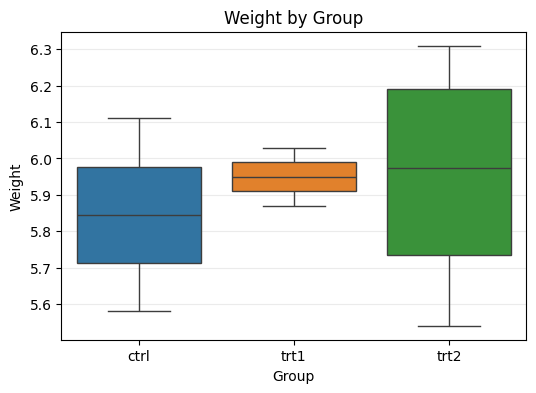

In [33]:
above_55 = PlantGrowth.loc[PlantGrowth['weight'] > 5.5]
plt.figure(figsize=(6,4))
sns.boxplot(x='group', y='weight', data=above_55, palette='tab10', hue='group')
plt.xlabel('Group')
plt.ylabel('Weight')
plt.title('Weight by Group')
plt.grid(axis='y', alpha=0.25)
plt.savefig(fname='Above55')
plt.show()